### Importing libraries and data cleaning

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display in float
pd.set_option('display.float_format', lambda x: '%.3f' % x)

CSV_PATH = 'movies.csv'
df = pd.read_csv(CSV_PATH)


# We filter movies after year 2000
df = df[df['year'] >= 2000]
# We drop NaN rows
df = df.dropna()

# helper function to extract release country
def obtainCountry(string):
    idx1 = string.index("(")
    idx2 = string.index(")")
    return string[idx1 + 1: idx2]

df["releaseCountry"] = df["released"].apply(obtainCountry)

# helper function to categorise runtime into bins
def categoriseRuntime(runtime):
    if runtime < 60.0:
        return "< 60"
    elif runtime < 90.0:
        return "60 - 89"
    elif runtime < 120.0:
        return "90 - 119"
    elif runtime < 150.0:
        return "120 - 149"
    elif runtime < 180.0:
        return "150 - 179"
    elif runtime < 210.0:
        return "180 - 209"
    else:
        return ">= 210"

df["duration"] = df["runtime"].apply(categoriseRuntime)

## Analysing the relationship between run-time and other factors to obtain optimal run-time

- with IMDb score
- with gross revenue

/var/folders/jf/s8mc6w1n4kjfldmnfbjbxyfr0000gn/T/ipykernel_45124/1778846429.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


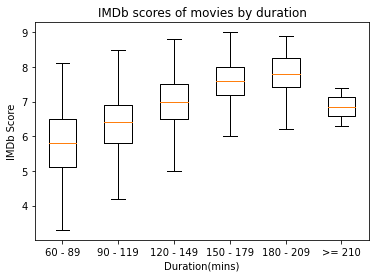

In [29]:
x = ["60 - 89", "90 - 119", "120 - 149", "150 - 179", "180 - 209", ">= 210"]

scores = []
for i in range(len(x)):
    filtered = df[df["duration"] == x[i]]
    scores.append(filtered["score"])

fig, ax = plt.subplots()
ax.set_xticklabels(x)
plt.boxplot(scores, showfliers=False)
plt.title("IMDb scores of movies by duration")
plt.xlabel("Duration(mins)")
plt.ylabel("IMDb Score")
plt.show()

/var/folders/jf/s8mc6w1n4kjfldmnfbjbxyfr0000gn/T/ipykernel_45124/4026491848.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


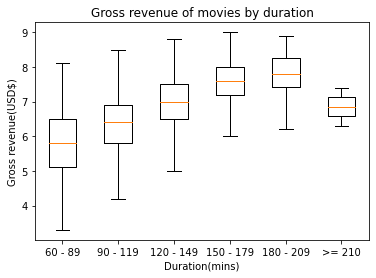

In [30]:
x = ["60 - 89", "90 - 119", "120 - 149", "150 - 179", "180 - 209", ">= 210"]

gross = []
for i in range(len(x)):
    filtered = df[df["duration"] == x[i]]
    gross.append(filtered["gross"])

fig, ax = plt.subplots()
ax.set_xticklabels(x)
plt.boxplot(scores, showfliers=False)
plt.title("Gross revenue of movies by duration")
plt.xlabel("Duration(mins)")
plt.ylabel("Gross revenue(USD$)")
plt.show()

## Determining the best main actor/actress to engage for the movie

- by comparing number of appearances made in movies with IMDb scores >= 8.0
- by comparing mean revenue of all movies starred in

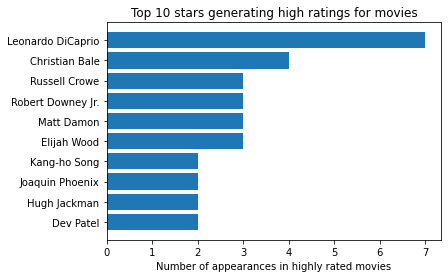

In [31]:
topscores = df[df["score"] >= 8.0]
top10stars_score = topscores[["star", "score"]].groupby("star").count().reset_index().nlargest(10, "score")
top10stars_score = top10stars_score.rename(columns={"score": "appearances"})
top10stars_score = top10stars_score.sort_values("appearances")

fig, ax = plt.subplots()
ax.barh(top10stars_score["star"], top10stars_score["appearances"])
plt.title("Top 10 stars generating high ratings for movies")
plt.xlabel("Number of appearances in highly rated movies")
plt.show()


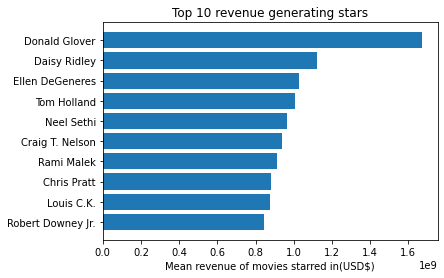

In [32]:
top10stars_gross = df[["star", "gross"]].groupby("star").mean().reset_index().nlargest(10, "gross")
top10stars_gross = top10stars_gross.sort_values("gross")

fig, ax = plt.subplots()
ax.barh(top10stars_gross["star"], top10stars_gross["gross"])
plt.title("Top 10 revenue generating stars")
plt.xlabel("Mean revenue of movies starred in(USD$)")
plt.show()

## Determining the best director to engage for the movie

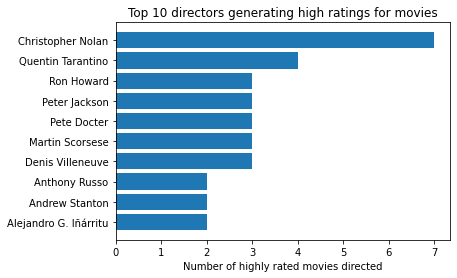

In [33]:
topscores = df[df["score"] >= 8.0]
top10directors_score = topscores[["director", "score"]].groupby("director").count().reset_index().nlargest(10, "score")
top10directors_score = top10directors_score.rename(columns={"score": "appearances"})
top10directors_score = top10directors_score.sort_values("appearances")

fig, ax = plt.subplots()
ax.barh(top10directors_score["director"], top10directors_score["appearances"])
plt.title("Top 10 directors generating high ratings for movies")
plt.xlabel("Number of highly rated movies directed")
plt.show()

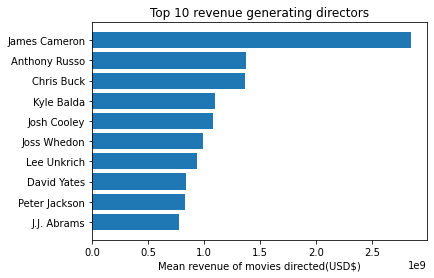

In [34]:
top10directors_gross = df[["director", "gross"]].groupby("director").mean().reset_index().nlargest(10, "gross")
top10directors_gross = top10directors_gross.sort_values("gross")

fig, ax = plt.subplots()
ax.barh(top10directors_gross["director"], top10directors_gross["gross"])
plt.title("Top 10 revenue generating directors")
plt.xlabel("Mean revenue of movies directed(USD$)")
plt.show()

## Determining which country to produce the movie in

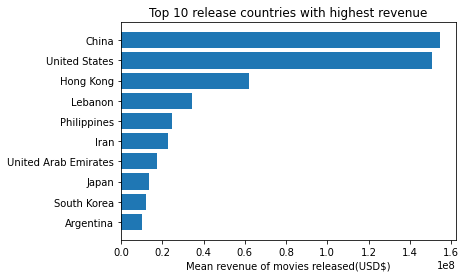

In [35]:
top10countries_gross = df[["releaseCountry", "gross"]].groupby("releaseCountry").mean().reset_index().nlargest(10, "gross")
top10countries_gross = top10countries_gross.sort_values("gross")

fig, ax = plt.subplots()
ax.barh(top10countries_gross["releaseCountry"], top10countries_gross["gross"])
plt.title("Top 10 release countries with highest revenue")
plt.xlabel("Mean revenue of movies released(USD$)")
plt.show()

### 1. Ratings vs Gross


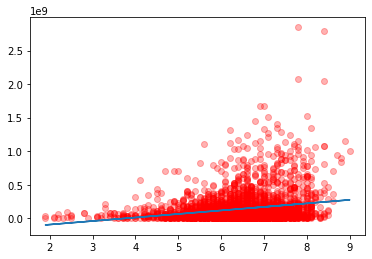

In [36]:
score_gross = df[['score','gross']]
plt.scatter(score_gross['score'],      
            score_gross['gross'],      
            c='r', alpha=0.3)      

m, b = np.polyfit(score_gross['score'],score_gross['gross'], 1)
plt.plot(score_gross['score'], m * score_gross['score'] + b);


### 2. Genre that the audience enjoys (Genre vs Score/Gross)

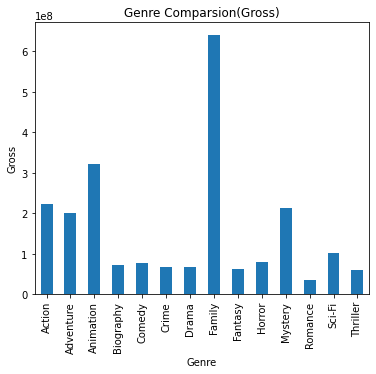

In [37]:
group_by_genre_df = df.groupby('genre')
gross_mean_across_genre = group_by_genre_df['gross'].mean()

gross_mean_across_genre.plot(kind='bar', title='Genre Comparsion(Gross)', ylabel='Gross',
         xlabel='Genre', figsize=(6, 5));

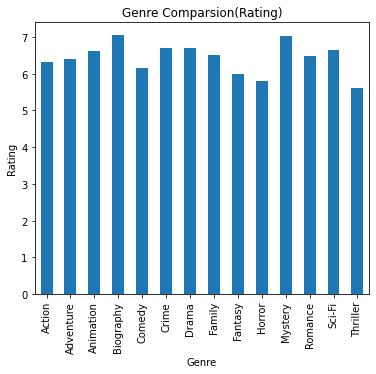

In [38]:
gross_mean_across_genre = group_by_genre_df['score'].mean()
gross_mean_across_genre.plot(kind='bar', title='Genre Comparsion(Rating)', ylabel='Rating',
         xlabel='Genre', figsize=(6, 5));

### 3. Budget vs Score

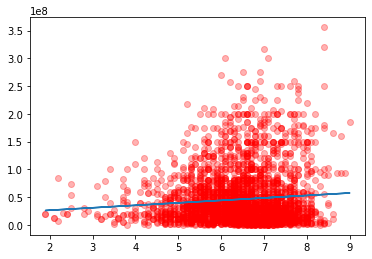

In [39]:
budget_score = df[['score','budget']]
plt.scatter(budget_score['score'],      
            budget_score['budget'],      
            c='r', alpha=0.3)      

m, b = np.polyfit(budget_score['score'],budget_score['budget'], 1)
plt.plot(budget_score['score'], m * budget_score['score'] + b);


### 4. IMDB number of votes vs score

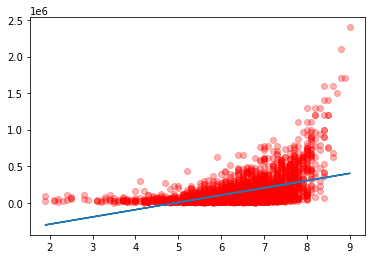

In [40]:
score_votes = df[['score','votes']]
plt.scatter(score_votes['score'],      
            score_votes['votes'],      
            c='r', alpha=0.3)      

m, b = np.polyfit(score_votes['score'],score_votes['votes'], 1)
plt.plot(score_votes['score'], m * score_votes['score'] + b);
